# Machine Learning 
## Final project

 Team members:
+ Oscar Ochoa
+ Victor Manuel Romo
+ Luis Cabello
+ Ana Sepúlveda
+ Enrique Villar

## Random Forest

### Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl;

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

%matplotlib inline

import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import library from my src folder    
from src.helpers import feature_importance_plot
from src.learning_curve_plot import learning_curve_plot


### Data setting

In [3]:
songs_data = pd.read_pickle("../data/songs_data_final.pkl")

In [4]:
target = songs_data["genre"]
features = songs_data.drop(["genre"], axis = 1)

In [5]:
X_train, X_test, y_train_rf, y_test_rf = train_test_split(features, target, test_size = 0.2, random_state = 8888)

In [6]:
rf = RandomForestClassifier()

### Model trainning

In [7]:
rf.fit(X_train, y_train_rf)

RandomForestClassifier()

In [8]:
y_pred_rf = rf.predict(X_test)

In [9]:
print("first five predicted values:", y_pred_rf[0:5])
print("first five actual values:", list(y_test_rf[0:5]))

first five predicted values: [4 5 4 2 3]
first five actual values: [3, 5, 1, 3, 3]


C:\Users\oscar\AppData\Local\Temp\ipykernel_8996\1312600343.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("first five actual values:", list(y_test_rf[0:5]))


### Evaluation metrics

In [10]:
print("accuracy:", round(accuracy_score(y_test_rf, y_pred_rf), 2))
print("recall:", round(recall_score(y_test_rf, y_pred_rf, average = 'weighted'), 2))
print("precision:", round(precision_score(y_test_rf, y_pred_rf, average = 'weighted'), 2))
print("f1-score:", round(f1_score(y_test_rf, y_pred_rf, average = 'weighted'), 2))

accuracy: 0.57
recall: 0.57
precision: 0.56
f1-score: 0.56


Confusion Matrix

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


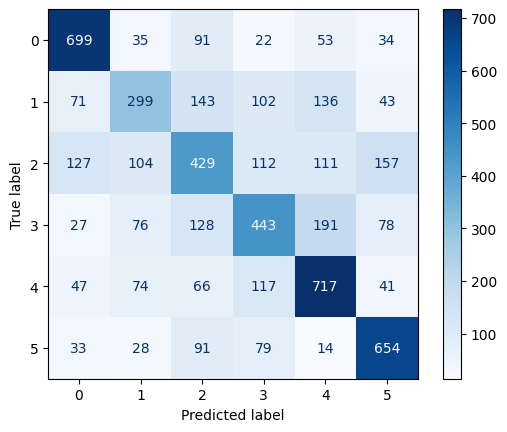

In [11]:
plot_confusion_matrix(rf, X_test, y_test_rf, cmap = plt.cm.Blues);

In [12]:
print(classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       934
           1       0.49      0.38      0.42       794
           2       0.45      0.41      0.43      1040
           3       0.51      0.47      0.49       943
           4       0.59      0.68      0.63      1062
           5       0.65      0.73      0.69       899

    accuracy                           0.57      5672
   macro avg       0.56      0.57      0.56      5672
weighted avg       0.56      0.57      0.56      5672



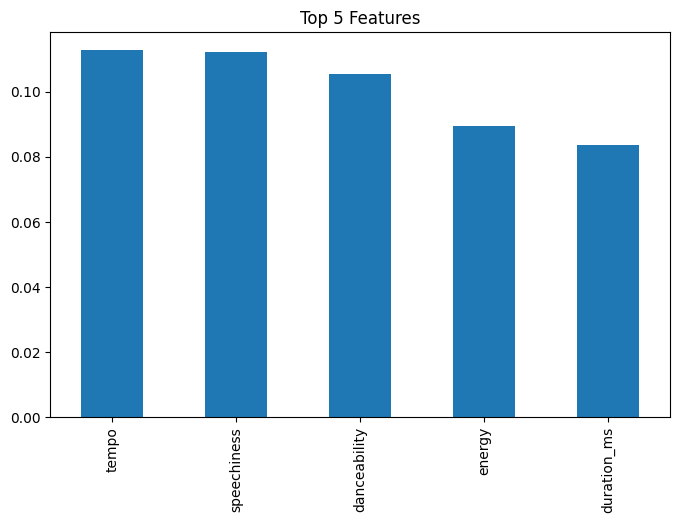

In [13]:
feature_importance_plot(rf, X_train,5)

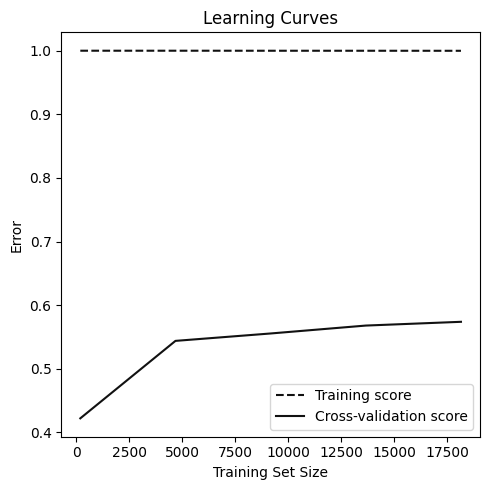

In [14]:
learning_curve_plot(rf, X_train, y_train_rf, scoring = 'accuracy')

### Summary

Comments
+ The model presents the following values:
    - accuracy: 0.57
    - recall: 0.57
    - precision: 0.57
    - f1-score: 0.57
+ The trainning curve demonstrate an improvement from the Decision Tree, but present overfitting
